# Pymaceuticals Inc.
---

### Analysis

In this study, 249 mice with Squamous Cell Carcinoma (SCC) tumors were subjected to various drug regimens over a 45-day period. The analysis provides a summary of key statistics for different drug regimens. It also touches upon the gender distribution among the mice, the dispersion of data in different regimens, the correlation between mouse weight and tumor volume, and a brief individual case study on the efficacy of Capomulin.

Population Distribution: The study had a relatively even distribution between female and male mice. This balance helps ensure that the results are not skewed by gender.

Drug Regimen Statistics: The summary statistics for the different drug regimens indicate that Capomulin and Ramicane tend to have lower mean and median tumor volumes compared to other regimens. Capomulin shows lower variance and standard deviation, indicating a lower dispersion of data, which can be seen as a positive sign of effectiveness. However, for a more comprehensive analysis, the study could include other factors like age, overall health, and potential side effects.

Correlation: The correlation coefficient of 0.84 suggests a strong positive correlation between mouse weight and tumor volume. This indicates that as the weight of the mice increases, the tumor volume tends to be higher. This insight can be valuable for understanding the relationship between these variables.

Case Study with Capomulin: An individual treated with Capomulin exhibited positive results. The analysis shows a decrease in tumor volume over sequential timepoints, indicating the drug's effectiveness for that specific mouse.

Data Focus: This study primarily focuses on tumor size as the indicator of treatment success. It does not consider other factors such as overall health conditions, side effects, or the influence of age on treatment results. For a more robust analysis, it would be beneficial to incorporate these additional variables.

In conclusion, while the provided analysis gives insights into the effectiveness of different drug regimens and the correlation between mouse weight and tumor volume, it is only a partial view. A more comprehensive analysis would require considering a broader set of factors and secondary effects. This analysis sets a foundation for further investigations into the efficacy of these treatments and their impact on various aspects of mice's health.


 

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

data_complete=pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [84]:
# Checking the number of mice.
number_mice= data_complete['Mouse ID'].nunique()
number_mice

249

In [85]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice= data_complete[data_complete.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]

duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [86]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

data_clean_f= data_complete.drop_duplicates(subset=['Mouse ID'])
data_clean=pd.DataFrame(data_clean_f)
data_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [87]:
# Checking the number of mice in the clean DataFrame.
num_mice = data_clean['Mouse ID'].nunique()
num_mice



249

## Summary Statistics

In [88]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped= data_complete.groupby('Drug Regimen')

summary_stats = grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 
                         'Tumor Volume Variance', 'Tumor Volume Std. Dev', 'Tumor Volume Std. Err']

summary_stats



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [89]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 
                'median', 'var', 'std', 'sem']) \
    .rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 
                     'std': 'Std. Deviation', 'sem': 'SEM'})
summary_stats

,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

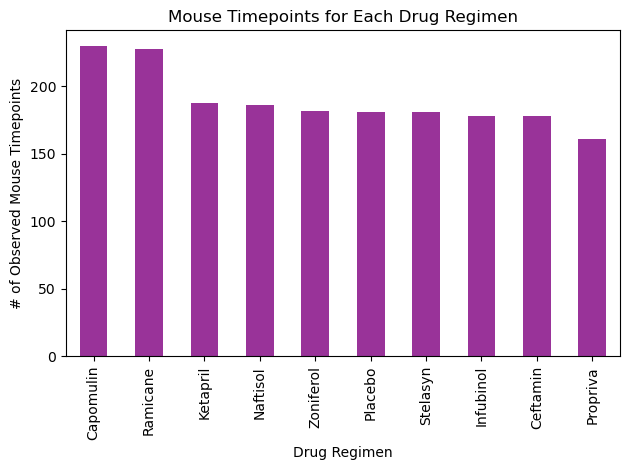

In [90]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar= data_complete['Drug Regimen'].value_counts()
bar.plot(kind='bar', color='purple', alpha=0.8)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Mouse Timepoints for Each Drug Regimen')
plt.tight_layout()
plt.show()

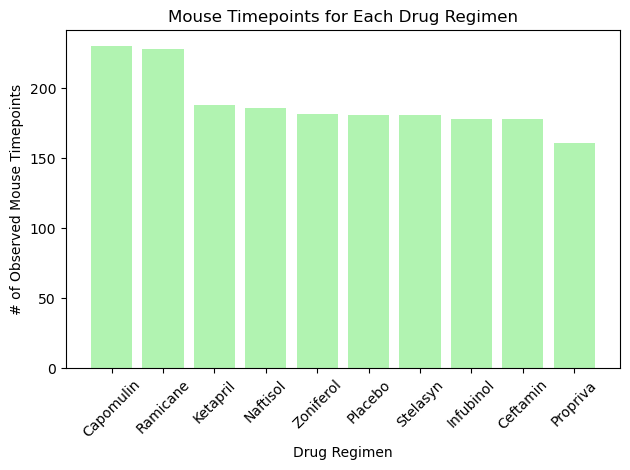

In [91]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data = data_complete['Drug Regimen'].value_counts()
regimens = data.index
counts = data.values

plt.bar( regimens, counts, color='lightgreen', alpha=0.7)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Mouse Timepoints for Each Drug Regimen') 

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Female vs. Male Mice')

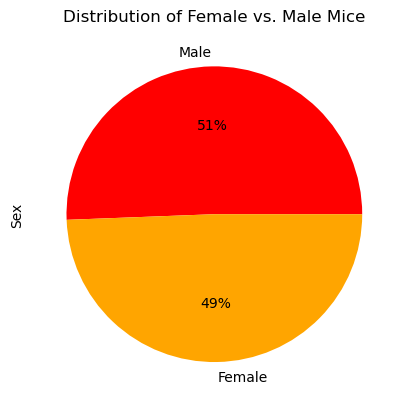

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = data_complete['Sex'].value_counts()
gender_distribution.plot.pie(
    autopct='%1.0f%%', 
    colors=['red', 'orange'])  
plt.title('Distribution of Female vs. Male Mice')


[]

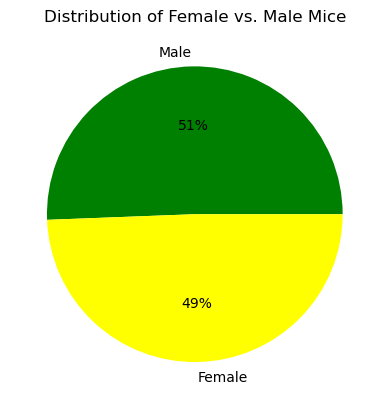

In [93]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_distribution = data_complete['Sex'].value_counts()
genders = gender_distribution.index
counts = gender_distribution.values
plt.pie(counts, labels=genders, autopct='%1.0f%%', colors=['green', 'yellow'])
plt.title('Distribution of Female vs. Male Mice')
plt.plot()

## Quartiles, Outliers and Boxplots

In [117]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes = data_complete[data_complete['Drug Regimen'].isin(selected_regimens)]\
    .groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor = pd.merge(final_tumor_volumes, data_complete, how="left", on=["Mouse ID",'Timepoint'])
last_tumor

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [119]:
# Put treatments into a list for a for loop (and later for plot labels)
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
outliers = {}

for regimen in selected_regimens:  
    regimen_data = data_complete[data_complete['Drug Regimen'] == regimen]

    tumor_volumes = regimen_data['Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volumes)

    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr

    # Determine outliers using upper and lower bounds
    potential_outliers = regimen_data[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    outliers[regimen] = potential_outliers

for regimen, potential_outliers in outliers.items():
    print(f"{regimen}'s potential outliers:")
    if not potential_outliers.empty:
        print(potential_outliers)
    else:
        print("Series([], Name: Tumor Volume (mm3), dtype: float64)")








Capomulin's potential outliers:
   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
18           25.472143                 1  
19           23.343598                 1  
Ramicane's potential outliers:
  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
9     k403     Ramicane  Male          21          16         45   

   Tumor Volume (mm3)  Metastatic Sites  
9           22.050126                 1  
Infubinol's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)


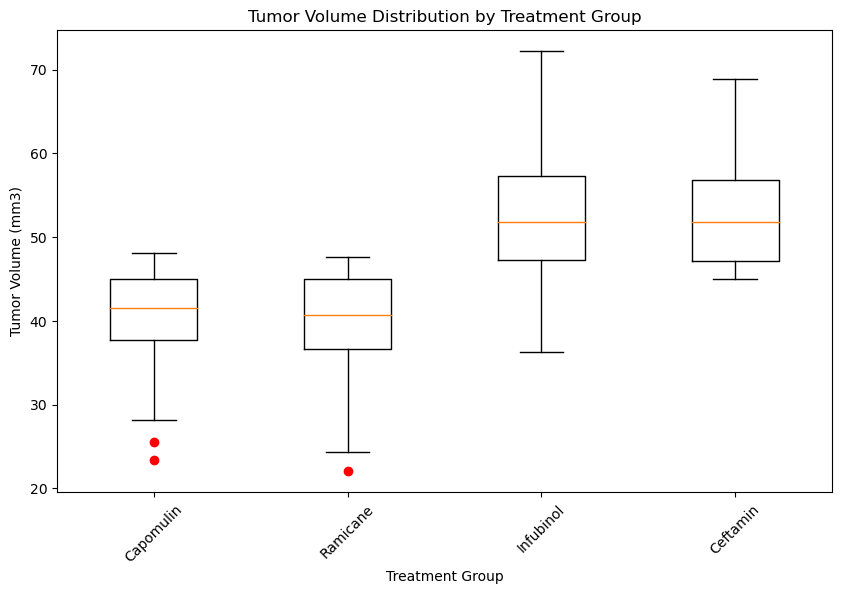

In [122]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=selected_regimens, sym='ro') 
plt.title("Tumor Volume Distribution by Treatment Group")
plt.xlabel("Treatment Group")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

## Line and Scatter Plots

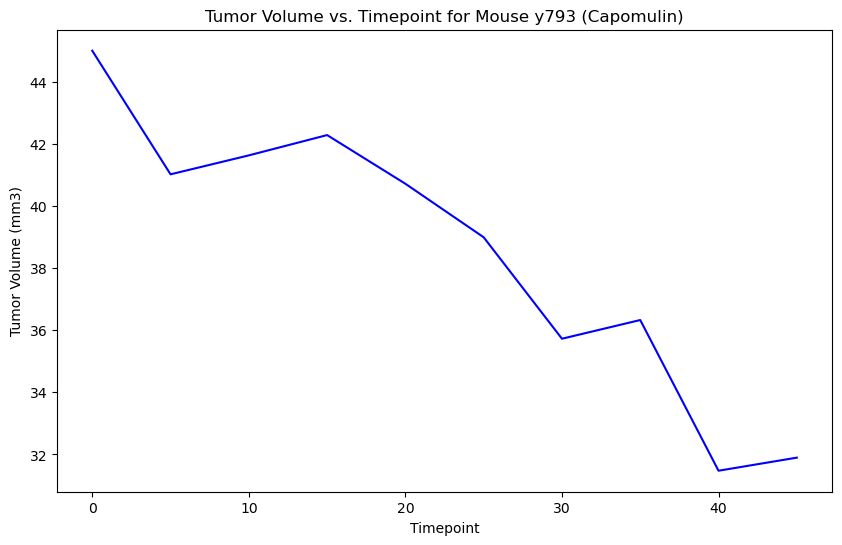

In [126]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'y793'  # Replace with the ID of the mouse you want to plot

# Step 2: Filter the data for the selected mouse and Capomulin treatment
capomulin_data = data_complete[(data_complete['Mouse ID'] == mouse_id) & (data_complete['Drug Regimen'] == 'Capomulin')]

# Step 3: Create a line plot of tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], linestyle='-', color='b')
plt.title(f"Tumor Volume vs. Timepoint for Mouse {mouse_id} (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(False)
plt.show()

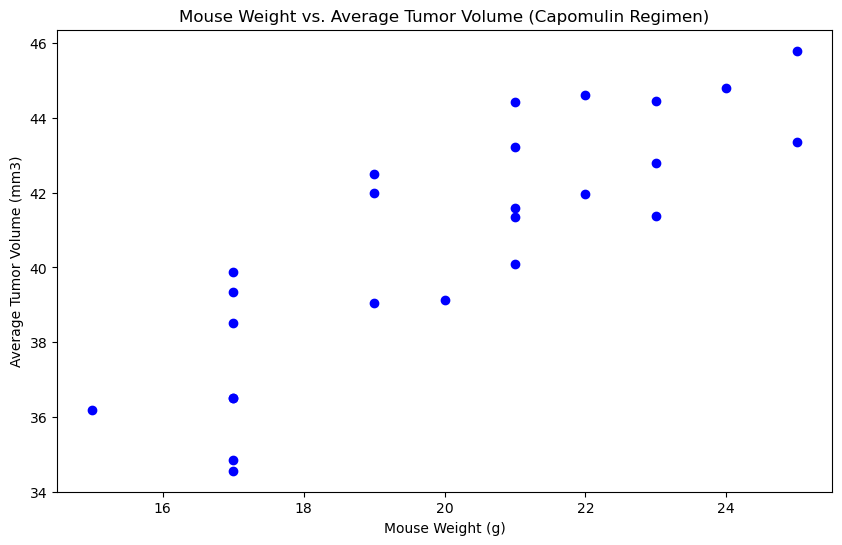

In [132]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = data_complete[data_complete['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Step 2: Obtain the corresponding weight for each mouse
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Step 3: Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, marker='o', facecolors='blue', edgecolors='blue')
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8419363424694721


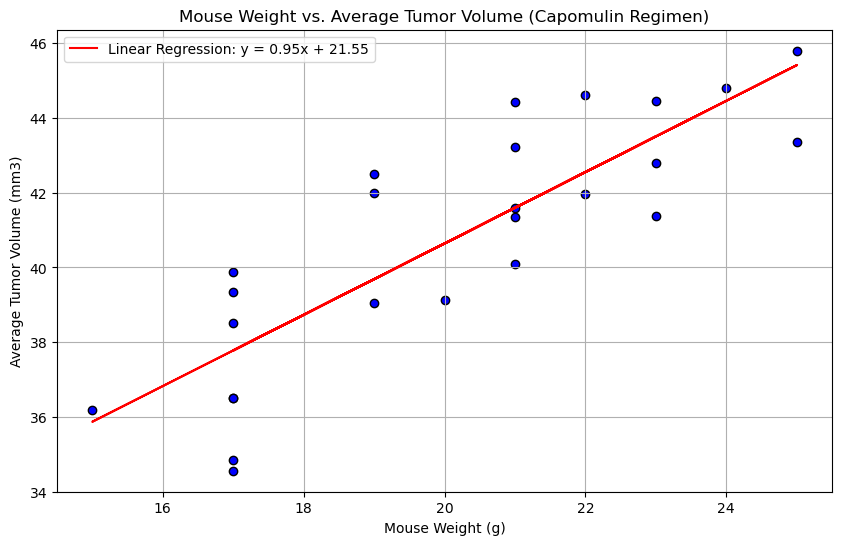

In [134]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress
capomulin_data = data_complete[data_complete['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Step 2: Obtain the corresponding weight for each mouse
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Step 3: Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, marker='o', facecolors='blue', edgecolors='black')
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Step 4: Calculate the correlation coefficient
correlation_coefficient = average_tumor_volume.corr(mouse_weights)
print(f"Correlation Coefficient: {correlation_coefficient}")

# Step 5: Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, average_tumor_volume)

# Step 6: Create a linear regression line for the scatter plot
regress_values = slope * mouse_weights + intercept

# Add the linear regression line to the scatter plot
plt.plot(mouse_weights, regress_values, "r-", label=f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}")

plt.grid(True)
plt.legend()
plt.show()

